In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df = pd.read_csv('spam.csv',encoding='latin')
df.shape

(5572, 5)

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# 1. Data Cleaning

In [4]:
# basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
#Renaming the Columns
df.rename({'v1':'Type','v2':'SMS'},axis=1,inplace=True)
df

,Type,SMS,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
## Removing the Last Three Columns

final_df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
final_df.sample(5)

,Type,SMS
146,spam,FreeMsg Why haven't you replied to my text? I'...
4776,ham,Sorry completely forgot * will pop em round th...
4802,ham,How do you plan to manage that
1187,ham,There's no point hangin on to mr not right if ...
1965,ham,Thanks. It was only from tescos but quite nice...


In [7]:
# Changing My Target to Labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
final_df['Type'] = le.fit_transform(final_df['Type'])

In [8]:
final_df.sample(5)

,Type,SMS
3092,0,staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323
3181,0,"My Parents, My Kidz, My Friends n My Colleague..."
4274,0,Haiyoh... Maybe your hamster was jealous of mi...
2988,1,No 1 POLYPHONIC tone 4 ur mob every week! Just...
1339,0,Every monday..nxt week vl be completing..


In [9]:
# Checking Missing Values
final_df.isnull().sum()

Type    0
SMS     0
dtype: int64

In [10]:
#Check for Duplicated Values
final_df.duplicated().sum()

403

In [11]:
#Remove Duplicates
final_df = final_df.drop_duplicates(keep='first')
final_df.head()

,Type,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
final_df.shape

(5169, 2)

In [13]:
final_df.duplicated().sum()

0

# 2. EDA

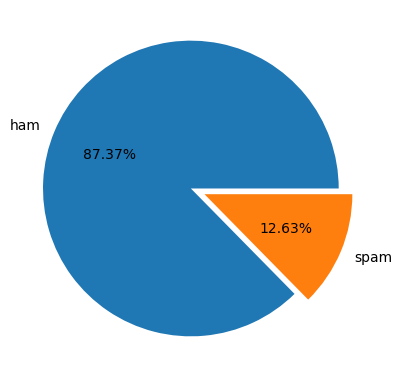

In [15]:
plt.pie(final_df['Type'].value_counts(),labels=['ham','spam'],autopct='%0.2f%%',explode=[0.1,0])
plt.show()

ham message is greater than spam so data is imblanced </br>
   notes need UnderSampling

In [17]:
# Now we are going to do Analysis on No. of Characters, Words, and Sentences Used in every Message

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mahmo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mahmo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
# Number of Characters
final_df['num_characters'] = final_df['SMS'].apply(len) 
final_df.head()

,Type,SMS,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
# Number of Words
final_df['num_words'] = final_df['SMS'].apply(lambda x:len(nltk.word_tokenize(x)))
final_df.head()

,Type,SMS,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [20]:
final_df['num_sentences'] = final_df['SMS'].apply(lambda x:len(nltk.sent_tokenize(x)))
final_df.head()

,Type,SMS,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
#ham
final_df[final_df['Type'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [20]:
# spam
final_df[final_df['Type'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


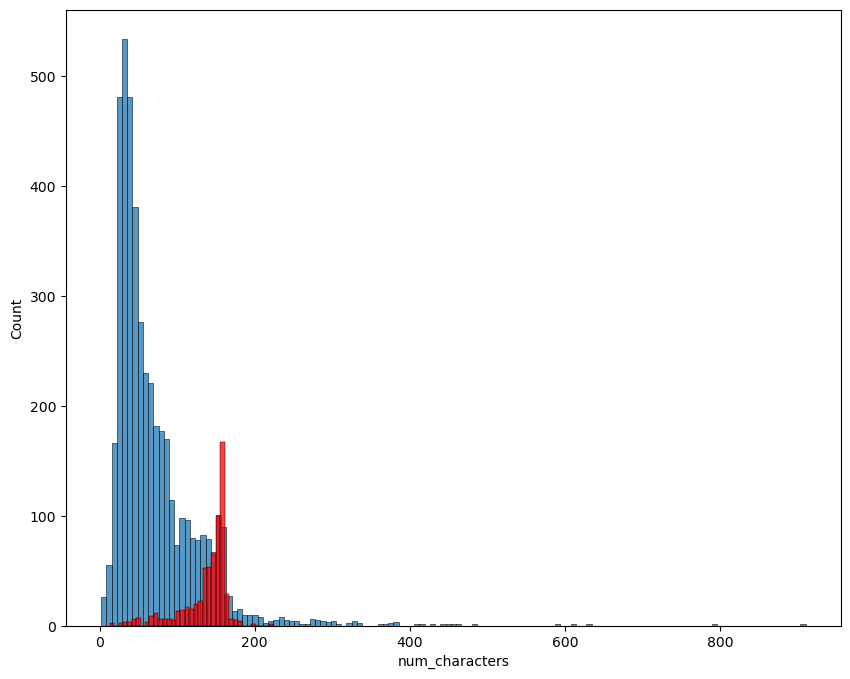

In [21]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.histplot(final_df[final_df['Type'] == 0]['num_characters'])
sns.histplot(final_df[final_df['Type'] == 1]['num_characters'],color='red')
plt.show()

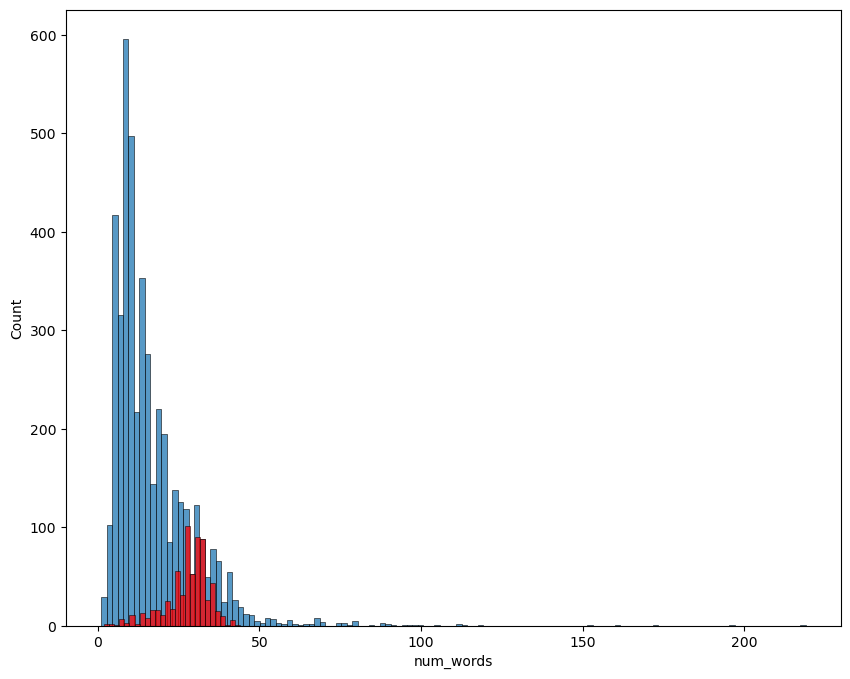

In [22]:
plt.figure(figsize=(10,8))
sns.histplot(final_df[final_df['Type'] == 0]['num_words'])
sns.histplot(final_df[final_df['Type'] == 1]['num_words'],color='red')
plt.show()

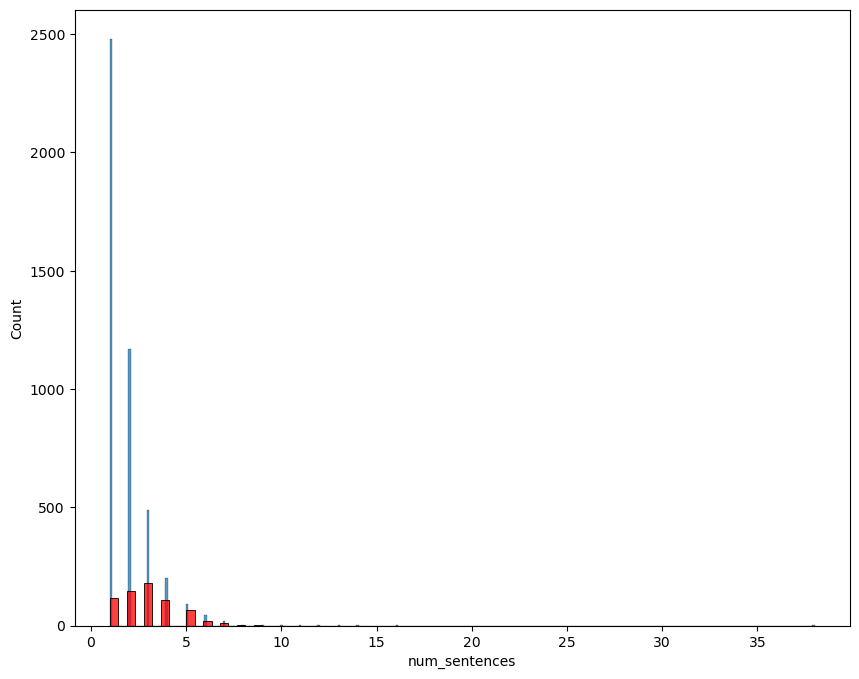

In [23]:
plt.figure(figsize=(10,8))
sns.histplot(final_df[final_df['Type'] == 0]['num_sentences'])
sns.histplot(final_df[final_df['Type'] == 1]['num_sentences'],color='red')
plt.show()

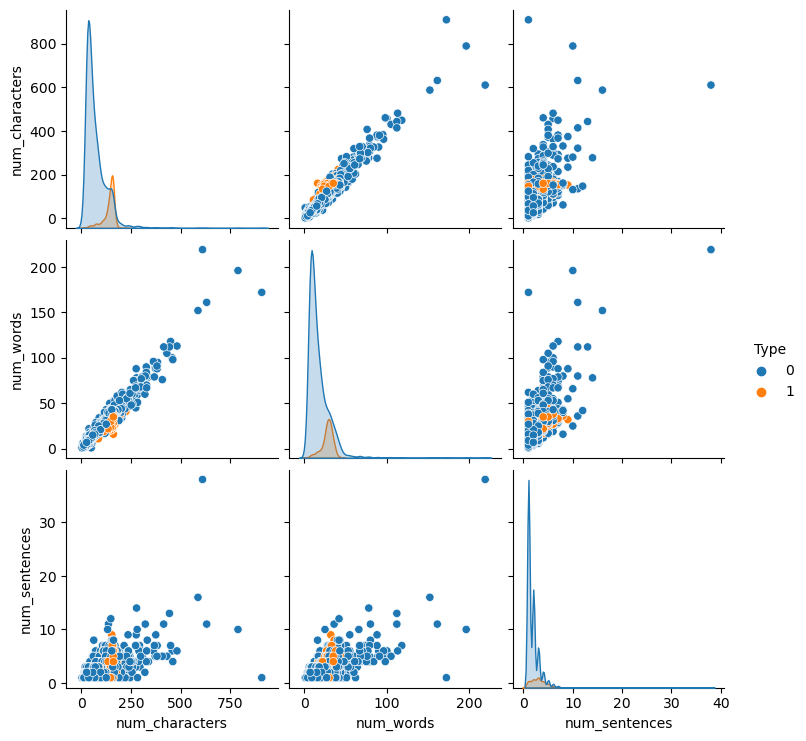

In [24]:
sns.pairplot(final_df,hue='Type')
plt.show()

it shows that ham messages (= 1) has more numbers of characters and words.</br>
Note:So Spam messages seems smaller than Ham

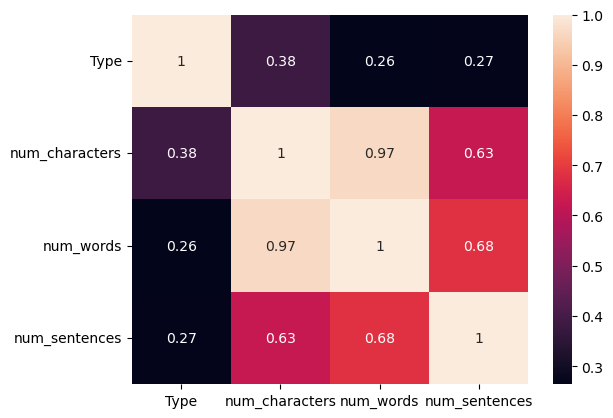

In [25]:
sns.heatmap(final_df.corr(),annot=True)
plt.show()

collaration amoung feature Vary Excellent

<AxesSubplot:xlabel='Type', ylabel='num_characters'>

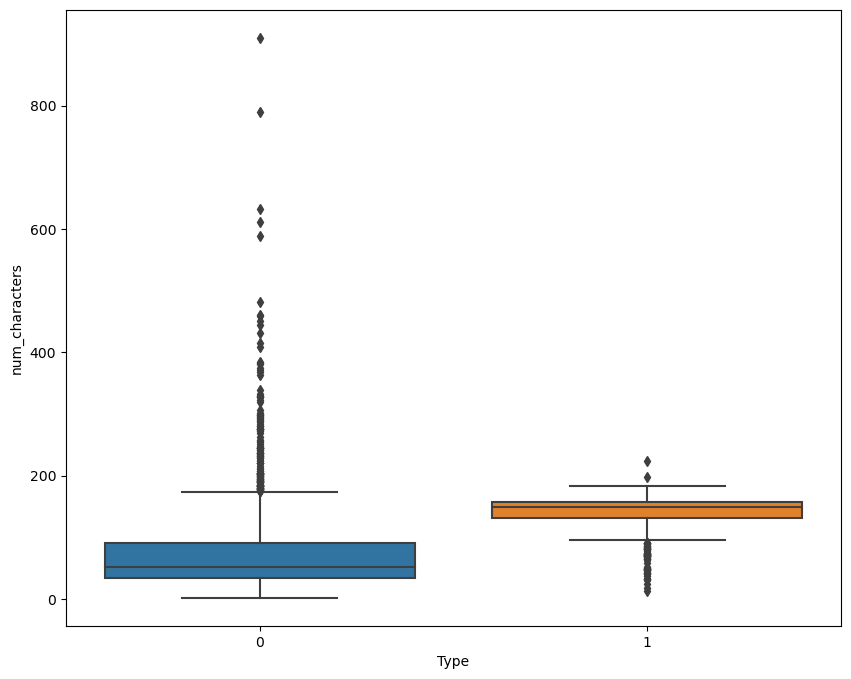

In [26]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Type',y='num_characters',data=final_df)

There is outliers 

# 3. Data Preprocessing

    1. Lowercase
    2. Tokenization
    3. Removing Special Character
    4. Removing stop words and punctuation
    5. stemming

In [22]:
# let's do data preprocessing like remove punctucation, stopwords, stemming.
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer

ps = PorterStemmer()

def text_processing(text):
    text = nltk.word_tokenize(text.lower())
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            stemming = ps.stem(i)
            y.append(stemming)
            
    return " ".join(y)

In [23]:
text_processing('I Loved the YT Lectures on machine Learning What About You! dacing dance danced')

'love yt lectur machin learn dace danc danc'

In [24]:
final_df['transformed_text'] = final_df['SMS'].apply(text_processing)

In [25]:
final_df.head()

,Type,SMS,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [28]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

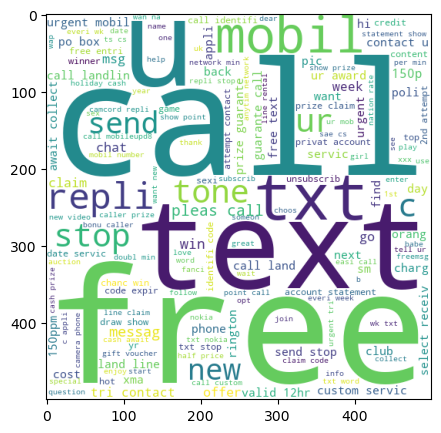

In [29]:
# Spam Word Cloud
spam_wc = wc.generate(final_df[final_df['Type'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize=(8,5))
plt.imshow(spam_wc)
plt.show()

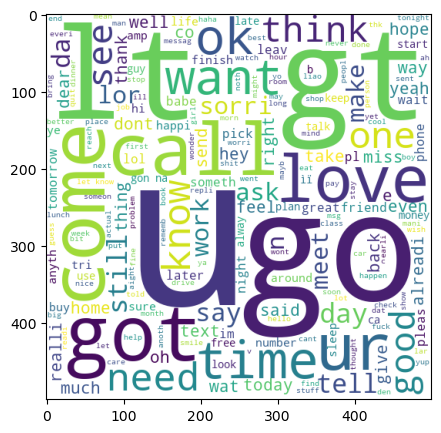

In [33]:
# Ham Word Cloud
ham_wc = wc.generate(final_df[final_df['Type'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize=(8,5))
plt.imshow(ham_wc)
plt.show()

In [33]:
# Converting Spam Messages to List of Words
x = final_df[final_df['Type'] == 1]['transformed_text'].str.cat(sep= " ")
spam_msg_word_list = x.split()
len(spam_msg_word_list)

9939

In [34]:
# Counting Top 30 Words from spam messages
from collections import Counter
spam_top_30words = pd.DataFrame(Counter(spam_msg_word_list).most_common(30))

In [35]:
# List of the Total Ham Words

ham_msg_list = final_df[final_df['Type'] == 0]['transformed_text'].tolist()
ham_msg_word_list = []

for i in ham_msg_list:
    for j in i.split():
        ham_msg_word_list.append(j)

In [36]:
# Converting Most Comman 30 WOrds to DataFrame
ham_top_30words = pd.DataFrame(Counter(ham_msg_word_list).most_common(30))
ham_top_30words.head()

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287


#  Model Building

In [37]:
# First of all We have to Convert Our SMS text to Vectors Using Bag of Words Technique

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tf = TfidfVectorizer(max_features=3000)

In [38]:
X = tf.fit_transform(final_df['transformed_text']).toarray()
# X = np.hstack((X,final_df['num_characters'].values.reshape(-1,1)))
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
y = np.array(final_df['Type'])
y

array([0, 0, 1, ..., 0, 0, 0])

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=48,test_size=0.30)

In [41]:
X_train.shape

(3618, 3000)

In [42]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,f1_score

gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [43]:
def model_scoring(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    acc_score = accuracy_score(y_test,pred)
    con_matrix = confusion_matrix(y_test,pred)
    pre_score = precision_score(y_test,pred)
    f1score = f1_score(y_test,pred)
    return acc_score,con_matrix,pre_score,f1score
    

In [44]:
model_scoring(gnb,X_train,X_test,y_train,y_test)

(0.8594455190199871,
 array([[1172,  184],
        [  34,  161]], dtype=int64),
 0.4666666666666667,
 0.5962962962962963)

In [45]:
model_scoring(bnb,X_train,X_test,y_train,y_test)

(0.9806576402321083,
 array([[1349,    7],
        [  23,  172]], dtype=int64),
 0.9608938547486033,
 0.9197860962566844)

In [46]:
model_scoring(mnb,X_train,X_test,y_train,y_test)

(0.970341715022566,
 array([[1355,    1],
        [  45,  150]], dtype=int64),
 0.9933774834437086,
 0.8670520231213873)

In [49]:
from sklearn.model_selection import StratifiedKFold
sss = StratifiedKFold(n_splits=8)

In [50]:
mnb_pre = []
gnb_pre = []
bnb_pre = []
mnb_acc = []
gnb_acc = []
bnb_acc = []
etc_acc = []


for train_index,test_index in sss.split(X,y):
    X_trai,X_tes = X[train_index],X[test_index]
    y_trai,y_tes = y[train_index],y[test_index]
    
    acc1,con1,pre1,f1 = model_scoring(mnb,X_trai,X_tes,y_trai,y_tes)
    acc2,con2,pre2,f1 = model_scoring(gnb,X_trai,X_tes,y_trai,y_tes)
    acc3,con3,pre3,f1 = model_scoring(bnb,X_trai,X_tes,y_trai,y_tes)
    
    mnb_pre.append(pre1)
    gnb_pre.append(pre2)
    bnb_pre.append(pre3)
    
    mnb_acc.append(acc1)
    gnb_acc.append(acc2)
    bnb_acc.append(acc3)

In [51]:
print(mnb_pre)
print(gnb_pre)
print(bnb_pre)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9852941176470589, 0.9552238805970149]
[0.48344370860927155, 0.45751633986928103, 0.44360902255639095, 0.48226950354609927, 0.4755244755244755, 0.47651006711409394, 0.5151515151515151, 0.461038961038961]
[0.963855421686747, 0.9863013698630136, 1.0, 0.972972972972973, 1.0, 0.971830985915493, 0.9855072463768116, 1.0]


In [52]:
print(mnb_acc)
print(gnb_acc)
print(bnb_acc)

[0.9876352395672334, 0.9767801857585139, 0.9705882352941176, 0.9736842105263158, 0.9767801857585139, 0.9767801857585139, 0.9752321981424149, 0.9674922600619195]
[0.865533230293663, 0.8544891640866873, 0.8513931888544891, 0.8668730650154799, 0.8622291021671826, 0.8622291021671826, 0.8792569659442725, 0.8544891640866873]
[0.9922720247295209, 0.9845201238390093, 0.9798761609907121, 0.9829721362229102, 0.9860681114551083, 0.9767801857585139, 0.9767801857585139, 0.9767801857585139]


# Now we are Going to Check some other Model Also

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [56]:
lg = LogisticRegression(penalty='l1',solver='liblinear')
sv = SVC(kernel='sigmoid',gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bg = BaggingClassifier(n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [57]:
clfs= {
    'LR':lg,
    'SVM':sv,
    'MNB':mnb,
    'DTC':dtc,
    'KNN':knn,
    'RFC':rfc,
    'ETC':etc,
    'ABC':abc,
    'BG':bg,
    'GBC':gbc,
    'XGB':xgb
}
clfs

{'LR': LogisticRegression(penalty='l1', solver='liblinear'),
 'SVM': SVC(gamma=1.0, kernel='sigmoid'),
 'MNB': MultinomialNB(),
 'DTC': DecisionTreeClassifier(max_depth=5),
 'KNN': KNeighborsClassifier(),
 'RFC': RandomForestClassifier(n_estimators=50, random_state=2),
 'ETC': ExtraTreesClassifier(n_estimators=50, random_state=2),
 'ABC': AdaBoostClassifier(random_state=2),
 'BG': BaggingClassifier(n_estimators=50, random_state=2),
 'GBC': GradientBoostingClassifier(n_estimators=50, random_state=2),
 'XGB': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=Non

In [58]:
def score_prediction(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    pr = model.predict(X_test)
    acc_score = accuracy_score(y_test,pr)
    pre_score = precision_score(y_test,pr)
    
    return acc_score,pre_score

In [59]:
# model evaluations
acc_score = []
pre_score = []

for name,clf in clfs.items():
    current_score,current_precision = score_prediction(clf,X_train,X_test,y_train,y_test)
   
    acc_score.append(current_score)
    pre_score.append(current_precision)

In [60]:
acc_score

[0.9484203739522888,
 0.9716312056737588,
 0.970341715022566,
 0.9264990328820116,
 0.9110251450676983,
 0.9722759509993553,
 0.9748549323017408,
 0.9658284977433914,
 0.9587362991618311,
 0.9471308833010961,
 0.9658284977433914]

In [61]:
pre_score

[0.896551724137931,
 0.9631901840490797,
 0.9933774834437086,
 0.813953488372093,
 1.0,
 0.9935064935064936,
 0.9936708860759493,
 0.9382716049382716,
 0.8579234972677595,
 0.937984496124031,
 0.9034090909090909]

In [62]:
# mnb,etc are the best Models For Our Data and Now we will try to Improve Performance of them
from sklearn.ensemble import VotingClassifier
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)

In [63]:
score_prediction(mnb,X_train,X_test,y_train,y_test)

(0.970341715022566, 0.9933774834437086)

In [64]:
score_prediction(etc,X_train,X_test,y_train,y_test)

(0.9748549323017408, 0.9936708860759493)

In [65]:
# Let's use Ensemle technique like Voting Classifier
voting = VotingClassifier(estimators=[('mnb',mnb),('rfc',rfc)],voting='soft')

In [66]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('mnb', MultinomialNB()),
                             ('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [67]:
y_pred = voting.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9761444229529336
0.9876543209876543


In [69]:
# function to do model evaluation
voting_pre = []
voting_acc = []

for train_index,test_index in sss.split(X,y):
    X_trai,X_tes = X[train_index],X[test_index]
    y_trai,y_tes = y[train_index],y[test_index]
    
    acc,con,pre,f = model_scoring(voting,X_trai,X_tes,y_trai,y_tes)
    
    voting_pre.append(pre)
    voting_acc.append(acc)
   

In [70]:
print(voting_pre)
print(voting_acc)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9848484848484849]
[0.990726429675425, 0.9814241486068112, 0.9690402476780186, 0.9798761609907121, 0.9798761609907121, 0.9705882352941176, 0.9767801857585139, 0.9721362229102167]


Voting Classifier is giving us very good score. So, we will use this model for prediction.

# Thank You!